In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
from sklearn import preprocessing

In [7]:
os.listdir()

['.ipynb_checkpoints',
 'book_v1.ipynb',
 'dataset',
 'model_v1.py',
 'papers',
 'X_train.txt']

In [18]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'

In [64]:
# load a single file into a numpy array
def load_file(filepath):
    df = pd.read_csv(filepath, delim_whitespace=True, header=None)
    return df.values # conversts dataframe into numpy arrays

In [3]:
df = pd.read_csv('F:\Fifth Sem\prml\course_project\dataset\WISDM_ar_v1.1\WISDM_ar_v1.1_raw.txt', header=None, error_bad_lines=False)

b'Skipping line 371935: expected 6 fields, saw 11\n'
b'Skipping line 711487: expected 6 fields, saw 11\n'
b'Skipping line 832906: expected 6 fields, saw 7\nSkipping line 832907: expected 6 fields, saw 7\nSkipping line 832908: expected 6 fields, saw 7\nSkipping line 832909: expected 6 fields, saw 7\nSkipping line 832910: expected 6 fields, saw 7\nSkipping line 832911: expected 6 fields, saw 7\nSkipping line 832912: expected 6 fields, saw 7\nSkipping line 832913: expected 6 fields, saw 7\nSkipping line 832914: expected 6 fields, saw 7\nSkipping line 832915: expected 6 fields, saw 7\nSkipping line 832916: expected 6 fields, saw 7\nSkipping line 832917: expected 6 fields, saw 7\nSkipping line 832918: expected 6 fields, saw 7\nSkipping line 832919: expected 6 fields, saw 7\nSkipping line 832920: expected 6 fields, saw 7\nSkipping line 832921: expected 6 fields, saw 7\nSkipping line 832922: expected 6 fields, saw 7\nSkipping line 832923: expected 6 fields, saw 7\nSkipping line 832924: expect

In [4]:
df.columns = (['user_id', 'activity', 'time', 'X', 'Y', 'Z'])

In [5]:
df.head()

,user_id,activity,time,X,Y,Z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [6]:
df.describe()

,user_id,time,X,Y,Z
count,1.086472e+06,1.086472e+06,1.086472e+06,1.086472e+06,1.086471e+06
mean,1.883756e+01,3.250260e+13,6.641263e-01,7.246008e+00,3.977056e-01
std,1.026679e+01,4.893640e+13,6.876260e+00,6.739791e+00,4.761105e+00
min,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,1.999700e+12,-2.910000e+00,3.170000e+00,-2.220117e+00
50%,1.900000e+01,9.396143e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,2.800000e+01,3.509464e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [ ]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plot_activity("Sitting", df)

In [7]:
work = df.set_index('activity')

In [8]:
work.head()

,user_id,time,X,Y,Z
activity,,,,,
Jogging,33,49105962326000,-0.694638,12.680544,0.503953
Jogging,33,49106062271000,5.012288,11.264028,0.953424
Jogging,33,49106112167000,4.903325,10.882658,-0.081722
Jogging,33,49106222305000,-0.612916,18.496431,3.023717
Jogging,33,49106332290000,-1.184970,12.108489,7.205164


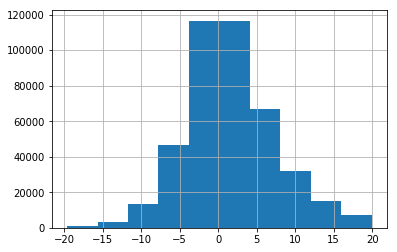

In [9]:
work.loc['Walking']['X'].hist()

In [10]:
activities = ['Sitting','Standing', 'Walking','Upstairs','Downstairs','Jogging']
axes = ['X', 'Y', 'Z']

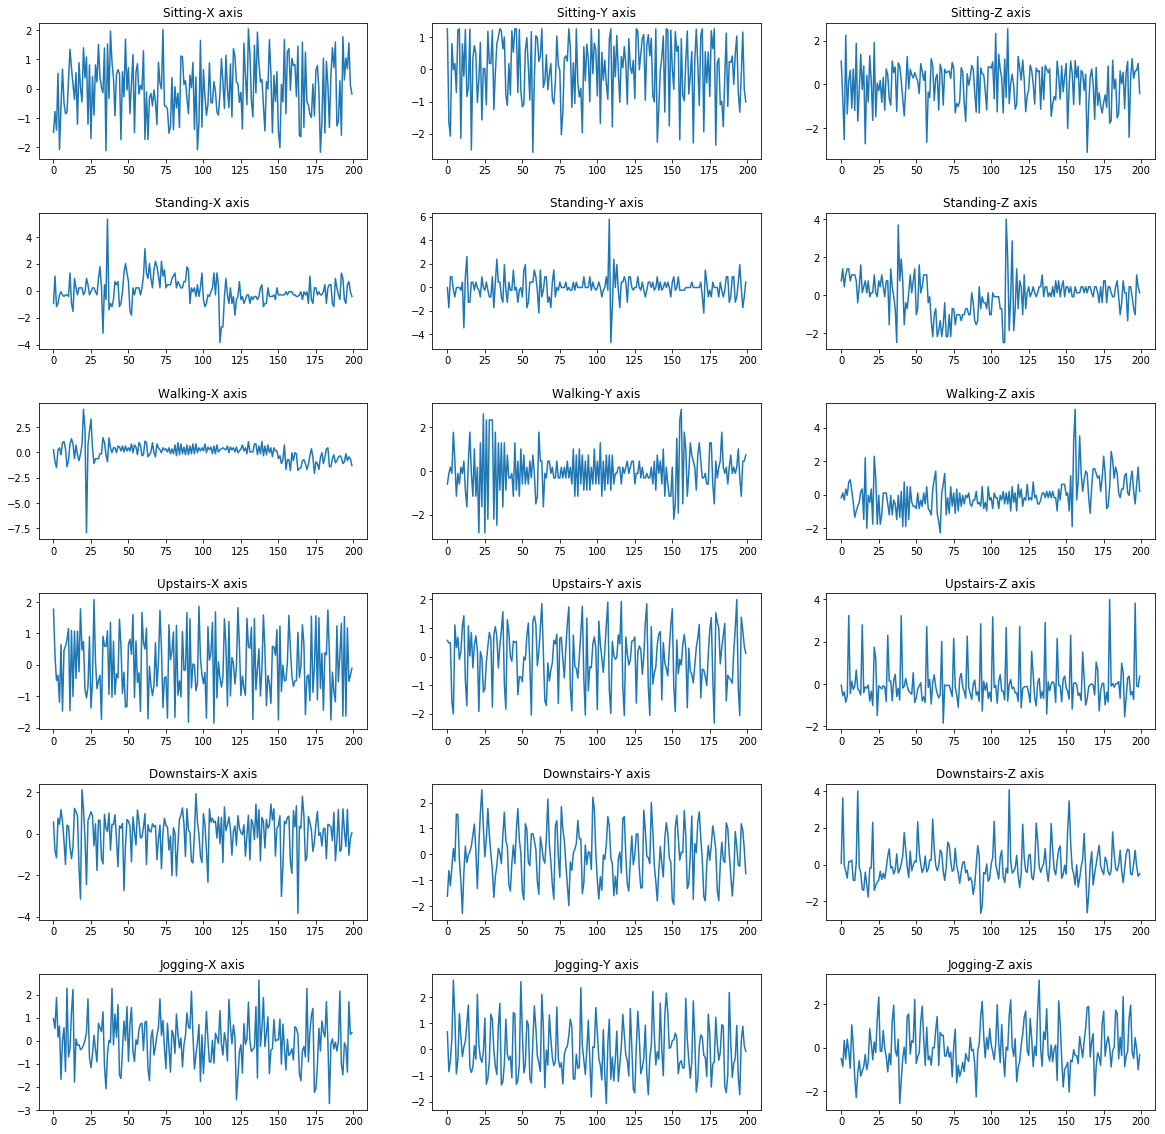

In [23]:
# Create 18 subplots here, three for each activity and one for each axis!
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4)

for i in range(0, len(activities)):
    act = activities[i-1]
    
    for j in range(1, 4):
        num = 3*i + j
        plt.subplot(6,3,num)
        std_scalar = preprocessing.StandardScaler()
        std_data = std_scalar.fit_transform(work.loc[act][axes[j-1]][800:1000].values.reshape(-1,1))
        plt.plot(std_data)
        plt.title(f'{activities[i]}-{axes[j-1]} axis')
        
    
    

In [148]:
activites = list(set(work.index))

In [14]:
work.loc['Walking']['X'][:200].values

array([ 0.84446156,  1.1168685 , -0.50395286,  4.7943625 , -0.04086104,
        2.4925237 ,  0.53119355,  1.7570249 ,  2.982856  , -0.8036005 ,
        0.19068487, -0.3405087 ,  0.46309182,  0.08172209, -0.7627395 ,
       -1.607201  ,  1.4573772 ,  1.0351465 ,  2.8738933 , -3.9499009 ,
        4.372132  , -1.7978859 ,  1.920469  , -4.440233  ,  1.4573772 ,
        1.920469  ,  1.879608  ,  2.7649305 , -1.1441092 ,  4.140586  ,
       -1.334794  ,  1.334794  , -4.1814466 ,  1.7297841 ,  0.14982383,
        2.982856  ,  2.8330324 , -4.1814466 ,  5.284695  , -2.1383946 ,
        4.8216033 ,  1.1441092 , -1.9885708 , -0.14982383,  4.372132  ,
        2.5606253 ,  0.10896278, -0.6946377 , -2.1792557 , -5.012288  ,
        4.903325  , -0.10896278,  0.7627395 ,  3.6774938 , -4.862464  ,
        0.88532263, -2.7240696 ,  1.1849703 ,  4.099725  , -1.607201  ,
        0.313268  ,  4.6036777 , -1.0760075 ,  3.5957718 , -0.7218784 ,
       -1.525479  , -4.2904096 ,  4.372132  ,  0.6946377 ,  1.22

In [74]:
# Preprocessing the dataset to remove the nan values.
inp = work.dropna()

In [75]:
print(work.shape, inp.shape)

(1086472, 5) (1086471, 5)


In [25]:
from scipy import stats

In [76]:
N_TIME_STEPS = 200
N_FEATURES = 3
step = 20
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = inp['X'].values[i: i + N_TIME_STEPS]
    ys = inp['Y'].values[i: i + N_TIME_STEPS]
    zs = inp['Z'].values[i: i + N_TIME_STEPS]
    label = act_labels[stats.mode(inp.index[i: i + N_TIME_STEPS])[0][0]]
    segments.append([xs, ys, zs])
    labels.append(label)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [77]:
np.array(segments).shape

(54314, 3, 200)

In [78]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
one_hot_labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [102]:
if True in np.isnan(reshaped_segments):
    print("Nan found")
else:
    print('Nan not found')

Nan not found


In [81]:
one_hot_labels.shape

(54314, 6)

In [32]:
# Create a dict containing the activity and the class labels
act_labels = {}
for i in range(len(activities)):
    act_labels[activities[i]] = i

In [33]:
act_labels

{'Sitting': 0,
 'Standing': 1,
 'Walking': 2,
 'Upstairs': 3,
 'Downstairs': 4,
 'Jogging': 5}

In [37]:
act_labels[stats.mode(work.index[:5])[0][0]]

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


5

In [82]:
from sklearn.model_selection import train_test_split

In [103]:
RANDOM_SEED = 1
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, one_hot_labels, test_size=0.1, random_state=RANDOM_SEED)

In [127]:
True in np.isinf(X_train)

False

In [53]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

In [56]:
n_output = 6

In [128]:
model = Sequential()
model.add(LSTM(64, input_shape=(200,3), activation='tanh'))
model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu'))
model.add(Dense(n_output, activation='softmax'))

In [129]:
adam = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [130]:
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1)

Epoch 1/10
48882/48882 [==============================] - 156s 3ms/step - loss: 1.1412 - acc: 0.5601
Epoch 2/10
48882/48882 [==============================] - 139s 3ms/step - loss: 0.6159 - acc: 0.7865
Epoch 3/10
48882/48882 [==============================] - 140s 3ms/step - loss: 0.5474 - acc: 0.8067
Epoch 4/10
48882/48882 [==============================] - 139s 3ms/step - loss: 0.4516 - acc: 0.8280
Epoch 5/10
48882/48882 [==============================] - 139s 3ms/step - loss: 0.4368 - acc: 0.8315
Epoch 6/10
48882/48882 [==============================] - 139s 3ms/step - loss: 0.3940 - acc: 0.8450
Epoch 7/10
48882/48882 [==============================] - 138s 3ms/step - loss: 0.3876 - acc: 0.8506
Epoch 8/10
48882/48882 [==============================] - 139s 3ms/step - loss: 0.3807 - acc: 0.8535
Epoch 9/10
48882/48882 [==============================] - 141s 3ms/step - loss: 0.3431 - acc: 0.8638
Epoch 10/10
48882/48882 [==============================] - 140s 3ms/step - loss: 0.3282 - a

In [135]:
test_loss, accuracy = model.evaluate(X_test, y_test, batch_size=1000, verbose=1)

5432/5432 [==============================] - 2s 425us/step


In [136]:
print(f'Test Set Accuracy: {accuracy} Test Set loss: {test_loss}')

Test Set Accuracy: 0.869108980727301 Test Set loss: 0.3333062904836152


0.3333062904836152

In [117]:
# Read the files
with open('F:\Fifth Sem\prml\course_project\dataset\WISDM_ar_v1.1\WISDM_ar_v1.1_raw.txt') as f:
    data = f.readlines()

In [118]:
# File rewriting.
with open('F:\Fifth Sem\prml\course_project\dataset\WISDM_ar_v1.1\WISDM_ar_v1.1_raw.txt', 'w') as f:
    for line in data:
        line = line.replace(';', '')
        f.write(line)

1098213

In [45]:
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix+name)
        
        

SyntaxError: invalid syntax (<ipython-input-45-9fe63153b246>, line 3)

In [51]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211829A0080>,
      dtype=object)

In [54]:
plt.show()